<a href="https://colab.research.google.com/github/Deepak-kumar2004/Deep-Learning-Sem-5/blob/main/Neural_Network_DL_SEM_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Test MSE: 3.2785374921368176


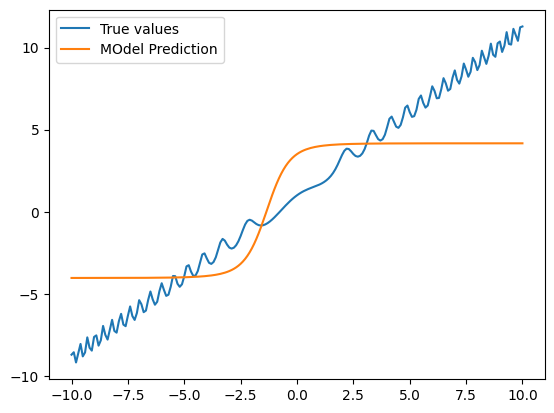

In [8]:
import math
import random
import matplotlib.pyplot as plt

# ---------- 1. Data ----------
def target_fn(x):
    return math.exp(-math.sin(x**2)/2) + x

# 25 points from –10 to 10
xs = [ -10 + i*(20/24) for i in range(25) ]
ys = [ target_fn(x) for x in xs ]

# split into train (20) and test (5)
indices = list(range(25))
random.shuffle(indices)
train_idx, test_idx = indices[:20], indices[20:]
x_train = [xs[i] for i in train_idx]
y_train = [ys[i] for i in train_idx]
x_test  = [xs[i] for i in test_idx]
y_test  = [ys[i] for i in test_idx]

# ---------- 2. Activation ----------
def tanh(z):
    e_pos = math.exp(z)
    e_neg = math.exp(-z)
    return (e_pos - e_neg) / (e_pos + e_neg)

def tanh_prime(z):
    t = tanh(z)
    return 1 - t*t

# ---------- 3. Parameters ----------
def rnd(): return random.uniform(-0.5, 0.5)

w1, b1 = rnd(), rnd()
w2, b2 = rnd(), rnd()
w3, b3 = rnd(), rnd()

learning_rate = 0.01
epochs = 5000

# ---------- 4. Training (batch gradient descent) ----------
for _ in range(epochs):
    # forward pass for all training samples
    z1_list, a1_list = [], []
    z2_list, a2_list = [], []
    z3_list, yhat_list = [], []
    for x in x_train:
        z1 = w1*x + b1
        a1 = tanh(z1)
        z2 = w2*a1 + b2
        a2 = tanh(z2)
        z3 = w3*a2 + b3
        yhat = tanh(z3)
        z1_list.append(z1); a1_list.append(a1)
        z2_list.append(z2); a2_list.append(a2)
        z3_list.append(z3); yhat_list.append(yhat)

    # compute gradients over entire batch
    m = len(x_train)
    dw1 = db1 = dw2 = db2 = dw3 = db3 = 0.0

    for x, y, z1, a1, z2, a2, z3, yhat in zip(
            x_train, y_train, z1_list, a1_list, z2_list, a2_list, z3_list, yhat_list):
        dL_dy = 2 * (yhat - y)
        d3 = dL_dy * tanh_prime(z3)
        dw3 += d3 * a2
        db3 += d3

        d2 = d3 * w3 * tanh_prime(z2)
        dw2 += d2 * a1
        db2 += d2

        d1 = d2 * w2 * tanh_prime(z1)
        dw1 += d1 * x
        db1 += d1

    # average the gradients
    dw1 /= m; db1 /= m
    dw2 /= m; db2 /= m
    dw3 /= m; db3 /= m

    # update all parameters at once
    w1 -= learning_rate * dw1; b1 -= learning_rate * db1
    w2 -= learning_rate * dw2; b2 -= learning_rate * db2
    w3 -= learning_rate * dw3; b3 -= learning_rate * db3

# ---------- 5. Evaluate ----------
def forward(x):
    z1 = w1*x + b1
    a1 = tanh(z1)
    z2 = w2*a1 + b2
    a2 = tanh(z2)
    z3 = w3*a2 + b3
    return z3

test_loss = sum((forward(x) - y)**2 for x, y in zip(x_test, y_test)) / len(x_test)
print("Test MSE:", test_loss)

# ---------- 6. Plot ----------
xx = [ -10 + i*0.1 for i in range(201) ]
true_vals = [ target_fn(x) for x in xx ]
pred_vals = [ forward(x) for x in xx ]

plt.plot(xx, true_vals, label="True values")
plt.plot(xx, pred_vals, label="MOdel Prediction")
plt.legend(); plt.show()


Choose activation (tanh/relu): relu
Activation: relu, Test MSE: 20.5464


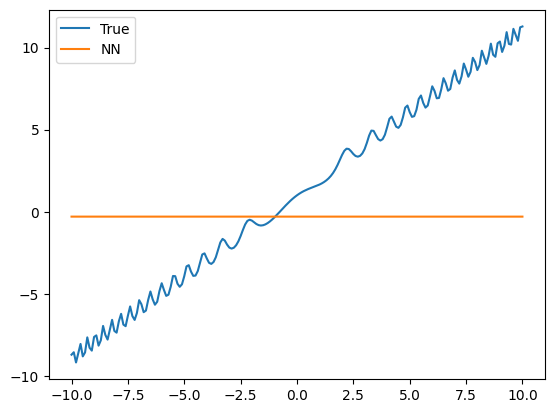

In [23]:
import math
import random
import matplotlib.pyplot as plt

# ---------- Data ----------
def target_fn(x):
    return math.exp(-math.sin(x**2)/2) + x

def make_data():
    xs = [ -10 + i*(20/24) for i in range(25) ]
    ys = [ target_fn(x) for x in xs ]
    idx = list(range(25))
    random.shuffle(idx)
    train = idx[:20]
    test  = idx[20:]
    x_train = [xs[i] for i in train]
    y_train = [ys[i] for i in train]
    x_test  = [xs[i] for i in test]
    y_test  = [ys[i] for i in test]
    return x_train, y_train, x_test, y_test

# ---------- Activations ----------
def tanh(z):
    e_pos = math.exp(z)
    e_neg = math.exp(-z)
    return (e_pos - e_neg) / (e_pos + e_neg)

def tanh_prime(z):
    t = tanh(z)
    return 1 - t*t

def relu(z):
    return z if z > 0 else 0

def relu_prime(z):
    return 1 if z > 0 else 0

# ---------- Network Training ----------
def train_network(x_train, y_train, x_test, y_test, activation="tanh",
                  lr=0.01, epochs=5000):

    # choose activation
    if activation == "relu":
        g, g_prime = relu, relu_prime
    else:
        g, g_prime = tanh, tanh_prime

    def rnd(): return random.uniform(-0.5, 0.5)
    w1, b1 = rnd(), rnd()
    w2, b2 = rnd(), rnd()
    w3, b3 = rnd(), rnd()

    m = len(x_train)

    for epoch in range(epochs):
        # forward all samples
        z1_list, a1_list = [], []
        z2_list, a2_list = [], []
        z3_list, yhat_list = [], []
        for x in x_train:
            z1 = w1*x + b1
            a1 = g(z1)
            z2 = w2*a1 + b2
            a2 = g(z2)
            z3 = w3*a2 + b3
            yhat = g(z3)
            z1_list.append(z1); a1_list.append(a1)
            z2_list.append(z2); a2_list.append(a2)
            z3_list.append(z3); yhat_list.append(yhat)

        # gradients
        dw1 = db1 = dw2 = db2 = dw3 = db3 = 0.0
        for x, y, z1, a1, z2, a2, z3, yhat in zip(
            x_train, y_train, z1_list, a1_list, z2_list, a2_list, z3_list, yhat_list):

            dL_dy = 2 * (yhat - y)
            d3 = dL_dy * g_prime(z3)
            dw3 += d3 * a2
            db3 += d3

            d2 = d3 * w3 * g_prime(z2)
            dw2 += d2 * a1
            db2 += d2

            d1 = d2 * w2 * g_prime(z1)
            dw1 += d1 * x
            db1 += d1

        # average & update
        w1 -= lr * dw1 / m; b1 -= lr * db1 / m
        w2 -= lr * dw2 / m; b2 -= lr * db2 / m
        w3 -= lr * dw3 / m; b3 -= lr * db3 / m

    # prediction function
    def forward(x):
        z1 = w1*x + b1; a1 = g(z1)
        z2 = w2*a1 + b2; a2 = g(z2)
        z3 = w3*a2 + b3; return g(z3)

    # test loss
    test_mse = sum((forward(x)-y)**2 for x,y in zip(x_test,y_test))/len(x_test)
    return forward, test_mse

# ---------- Main ----------
def main():
    x_train, y_train, x_test, y_test = make_data()
    # choose activation: "tanh" or "relu"
    act = input("Choose activation (tanh/relu): ").strip().lower()
    forward, mse = train_network(x_train, y_train, x_test, y_test,
                                 activation=act, lr=0.01, epochs=5000)
    print(f"Activation: {act}, Test MSE: {mse:.4f}")

    # plot
    xx = [ -10 + i*0.1 for i in range(201) ]
    plt.plot(xx, [target_fn(x) for x in xx], label="True")
    plt.plot(xx, [forward(x) for x in xx], label="NN")
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()


Epoch 0, MSE 68.1331
Epoch 500, MSE 0.1076
Epoch 1000, MSE 0.0999
Epoch 1500, MSE 0.0997
Epoch 2000, MSE 0.0997
Epoch 2500, MSE 0.0996
Epoch 3000, MSE 0.0996
Epoch 3500, MSE 0.0996
Epoch 4000, MSE 0.0996
Epoch 4500, MSE 0.0996
Test MSE: 20.237850568972977


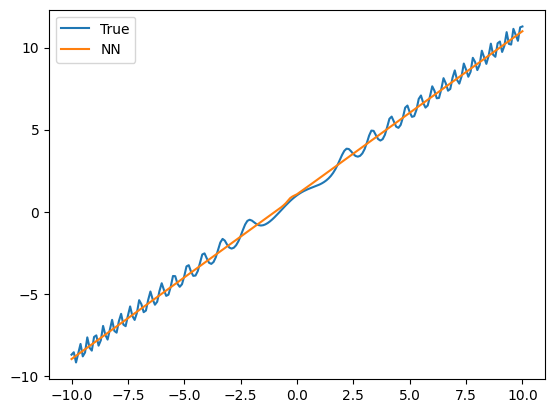

In [6]:
import math, random, matplotlib.pyplot as plt

# ---------- 1. Data ----------
def target_fn(x):
    return math.exp(-math.sin(x**2)/2) + x

xs = [ -10 + i*(20/24) for i in range(25) ]
ys = [ target_fn(x) for x in xs ]

idx = list(range(25))
random.shuffle(idx)
train_idx, test_idx = idx[:20], idx[20:]
x_train = [xs[i] for i in train_idx]
y_train = [ys[i] for i in train_idx]
x_test  = [xs[i] for i in test_idx]
y_test  = [ys[i] for i in test_idx]

# normalize inputs
mean_x = sum(x_train)/len(x_train)
std_x  = (sum((x-mean_x)**2 for x in x_train)/len(x_train))**0.5
x_train = [(x-mean_x)/std_x for x in x_train]
x_test  = [(x-mean_x)/std_x for x in x_test]

# ---------- 2. Activation ----------
def relu(z): return z if z > 0 else 0
def relu_prime(z): return 1 if z > 0 else 0

# ---------- 3. Network structure ----------
n_hidden = 8
def he_init(): return random.gauss(0, math.sqrt(2))  # fan_in = 1

# weights and biases
w1 = [he_init() for _ in range(n_hidden)]
b1 = [0.0 for _ in range(n_hidden)]
w2 = [random.gauss(0, math.sqrt(2/n_hidden)) for _ in range(n_hidden)]
b2 = 0.0

lr = 0.01
epochs = 5000
m = len(x_train)

# ---------- 4. Training ----------
for epoch in range(epochs):
    # forward pass for batch
    z1_list, a1_list, yhat_list = [], [], []
    for x in x_train:
        z1 = [w1[i]*x + b1[i] for i in range(n_hidden)]
        a1 = [relu(z) for z in z1]
        z2 = sum(w2[i]*a1[i] for i in range(n_hidden)) + b2
        yhat = z2  # linear output
        z1_list.append(z1); a1_list.append(a1); yhat_list.append(yhat)

    # gradients (start at zero)
    dw1 = [0.0]*n_hidden
    db1 = [0.0]*n_hidden
    dw2 = [0.0]*n_hidden
    db2 = 0.0

    for x, y, z1, a1, yhat in zip(x_train, y_train, z1_list, a1_list, yhat_list):
        dL_dy = 2 * (yhat - y)

        # output layer
        for i in range(n_hidden):
            dw2[i] += dL_dy * a1[i]
        db2 += dL_dy

        # hidden layer
        for i in range(n_hidden):
            d_hidden = dL_dy * w2[i] * relu_prime(z1[i])
            dw1[i] += d_hidden * x
            db1[i] += d_hidden

    # average gradients and update
    for i in range(n_hidden):
        w1[i] -= lr * dw1[i] / m
        b1[i] -= lr * db1[i] / m
        w2[i] -= lr * dw2[i] / m
    b2 -= lr * db2 / m

    # print loss occasionally
    if epoch % 500 == 0:
        mse = sum((yh - y)**2 for yh, y in zip(yhat_list, y_train)) / m
        print(f"Epoch {epoch}, MSE {mse:.4f}")

# ---------- 5. Prediction ----------
def forward(x):
    x = (x - mean_x)/std_x
    a1 = [relu(w1[i]*x + b1[i]) for i in range(n_hidden)]
    return sum(w2[i]*a1[i] for i in range(n_hidden)) + b2

test_mse = sum((forward(x)-y)**2 for x, y in zip(x_test, y_test)) / len(x_test)
print("Test MSE:", test_mse)

# ---------- 6. Plot ----------
xx = [ -10 + i*0.1 for i in range(201) ]
true_vals = [target_fn(x) for x in xx]
pred_vals = [forward(x) for x in xx]
plt.plot(xx, true_vals, label="True")
plt.plot(xx, pred_vals, label="NN")
plt.legend()
plt.show()


Choose activation (tanh/relu): tanh
Epoch 0, Train MSE 7.4556

Epoch 1000, Train MSE 0.0562

Epoch 2000, Train MSE 0.0522

Epoch 3000, Train MSE 0.0433

Epoch 4000, Train MSE 0.0371

Epoch 5000, Train MSE 0.0333



Activation: tanh
Training MSE: 0.0307
Test MSE: 25.9769


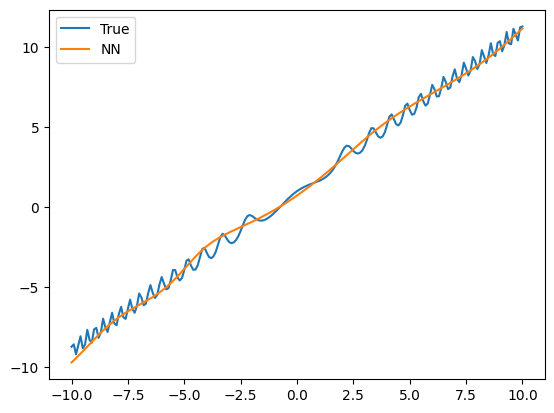

In [6]:
import math, random
import matplotlib.pyplot as plt

# ---------- Data ----------
def target_fn(x):
    return math.exp(-math.sin(x**2)/2) + x

def make_data():
    xs = [ -10 + i*(20/24) for i in range(25) ]
    ys = [ target_fn(x) for x in xs ]
    idx = list(range(25))
    random.shuffle(idx)
    train, test = idx[:20], idx[20:]
    x_train = [xs[i] for i in train]
    y_train = [ys[i] for i in train]
    x_test  = [xs[i] for i in test]
    y_test  = [ys[i] for i in test]
    return x_train, y_train, x_test, y_test

# ---------- Activations ----------
def tanh(z):
    e_pos = math.exp(z)
    e_neg = math.exp(-z)
    return (e_pos - e_neg) / (e_pos + e_neg)

def tanh_prime(z):
    t = tanh(z)
    return 1 - t*t

def relu(z): return z if z > 0 else 0
def relu_prime(z): return 1 if z > 0 else 0

# ---------- Network Training ----------
def train_network(x_train, y_train, x_test, y_test,
                  activation="tanh", lr=0.05, epochs=6000):

    # Normalize inputs
    mean_x = sum(x_train)/len(x_train)
    std_x  = (sum((x-mean_x)**2 for x in x_train)/len(x_train))**0.5
    x_train = [(x-mean_x)/std_x for x in x_train]
    x_test  = [(x-mean_x)/std_x for x in x_test]

    # choose activation
    if activation == "relu":
        g, g_prime = relu, relu_prime
        wscale = math.sqrt(2)   # He init
    else:
        g, g_prime = tanh, tanh_prime
        wscale = 1.0            # Xavier-like for tanh

    def rnd(): return random.gauss(0, wscale)

    # three-layer (1 hidden of 4 units for simplicity)
    hidden = 8
    w1 = [rnd() for _ in range(hidden)]
    b1 = [0.0]*hidden
    w2 = [rnd() for _ in range(hidden)]
    b2 = [0.0]*hidden
    w3, b3 = [rnd() for _ in range(hidden)], 0.0  # linear output weights

    m = len(x_train)

    for epoch in range(epochs):
        # gradients accumulators
        dw1 = [0.0]*hidden; db1 = [0.0]*hidden
        dw2 = [0.0]*hidden; db2 = [0.0]*hidden
        dw3 = [0.0]*hidden; db3 = 0.0

        for x_raw, y in zip(x_train, y_train):
            # forward
            z1 = [w1[i]*x_raw + b1[i] for i in range(hidden)]
            a1 = [g(z) for z in z1]
            z2 = [w2[i]*a1[i] + b2[i] for i in range(hidden)]
            a2 = [g(z) for z in z2]
            z3 = sum(w3[i]*a2[i] for i in range(hidden)) + b3
            yhat = z3  # linear output

            # backprop
            dL_dy = 2 * (yhat - y)
            for i in range(hidden):
                dw3[i] += dL_dy * a2[i]
            db3 += dL_dy

            d2 = [dL_dy * w3[i] * g_prime(z2[i]) for i in range(hidden)]
            for i in range(hidden):
                dw2[i] += d2[i] * a1[i]
                db2[i] += d2[i]

            d1 = [d2[i] * w2[i] * g_prime(z1[i]) for i in range(hidden)]
            for i in range(hidden):
                dw1[i] += d1[i] * x_raw
                db1[i] += d1[i]

        # update
        for i in range(hidden):
            w1[i] -= lr * dw1[i]/m; b1[i] -= lr * db1[i]/m
            w2[i] -= lr * dw2[i]/m; b2[i] -= lr * db2[i]/m
            w3[i] -= lr * dw3[i]/m
        b3 -= lr * db3/m

        if epoch % 1000 == 0:
            mse = sum(( (sum(w3[i]*g(w2[i]*g(w1[i]*x + b1[i]) + b2[i]) for i in range(hidden)) + b3) - y )**2
                      for x, y in zip(x_train, y_train))/m
            print(f"Epoch {epoch}, Train MSE {mse:.4f}\n")
    print("\n")

    # forward function using stored params
    def forward(x):
        x = (x - mean_x)/std_x
        a1 = [g(w1[i]*x + b1[i]) for i in range(hidden)]
        a2 = [g(w2[i]*a1[i] + b2[i]) for i in range(hidden)]
        return sum(w3[i]*a2[i] for i in range(hidden)) + b3

    # report both errors
    train_mse = sum((forward((x*std_x)+mean_x)-y)**2 for x,y in zip(x_train,y_train))/len(x_train)
    test_mse  = sum((forward(x)-y)**2 for x,y in zip(x_test,y_test))/len(x_test)
    return forward, train_mse, test_mse

# ---------- Main ----------
def main():
    x_train, y_train, x_test, y_test = make_data()
    act = input("Choose activation (tanh/relu): ").strip().lower()
    forward, train_mse, test_mse = train_network(
        x_train, y_train, x_test, y_test,
        activation=act, lr=0.05, epochs=6000
    )
    print(f"Activation: {act}")
    print(f"Training MSE: {train_mse:.4f}")
    print(f"Test MSE: {test_mse:.4f}")

    xx = [ -10 + i*0.1 for i in range(201) ]
    plt.plot(xx, [target_fn(x) for x in xx], label="True")
    plt.plot(xx, [forward(x) for x in xx], label="NN")
    plt.legend(); plt.show()

if __name__ == "__main__":
    main()
